In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import bioread as br
import matplotlib.pyplot as plt
import scipy.signal as ss

In [2]:
biopac_file = '/Users/katherine/Downloads/sub-PILOT02_ses-01.acq'

In [15]:
data = br.read(biopac_file)

In [16]:
data.graph_header.file_revision

132

In [17]:
len(data.channels)

4

In [19]:
print(data.channels[1].samples_per_second)
print(len(data.channels[1].data))
print(len(data.channels[1].upsampled_data))

2000.0
11869714
11869714


In [90]:
data.time_index

array([0.00000000e+00, 5.00000042e-04, 1.00000008e-03, ...,
       5.93485600e+03, 5.93485650e+03, 5.93485700e+03])

In [21]:
print(data.channels[0].samples_per_second,',', len(data.channels[0].data))

2000.0 , 11869714


In [22]:
data.channels[0].data[0]

0.00457763671875

In [23]:
data.channels[0].raw_data[0]

15

In [94]:
data.named_channels

{'ECG100C': Channel ECG100C: 11869714 samples, 2000.0 samples/sec, loaded: True,
 'TSD221-MRI - Respiration Transducer, MR': Channel TSD221-MRI - Respiration Transducer, MR: 11869714 samples, 2000.0 samples/sec, loaded: True,
 'EDA100C-MRI': Channel EDA100C-MRI: 11869714 samples, 2000.0 samples/sec, loaded: True,
 'Digital input': Channel Digital input: 11869714 samples, 2000.0 samples/sec, loaded: True}

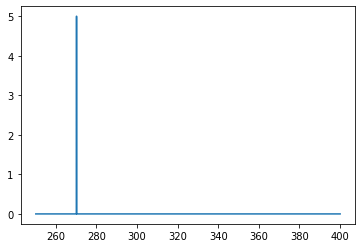

In [38]:
sns.lineplot(data.time_index[500242:800242], data.named_channels['Digital input'].data[500242:800242])

In [44]:
fives = np.where(data.named_channels['Digital input'].data >= 5)[0]

In [64]:
trigger = data.named_channels['Digital input'].data
ecg = data.named_channels['ECG100C'].data
resp = data.named_channels['TSD221-MRI - Respiration Transducer, MR'].data
eda = data.named_channels['EDA100C-MRI'].data

In [71]:
q = 2000
trigger_s = ss.decimate(trigger, q, ftype='fir')
ecg_s = ss.decimate(ecg, q, ftype='fir')
resp_s = ss.decimate(resp, q, ftype='fir')
eda_s = ss.decimate(eda, q, ftype='fir')

In [72]:
duration = trigger.shape[0]/2000
time = np.arange(0, duration, q/2000)

Text(0, 0.5, 'Trigger')

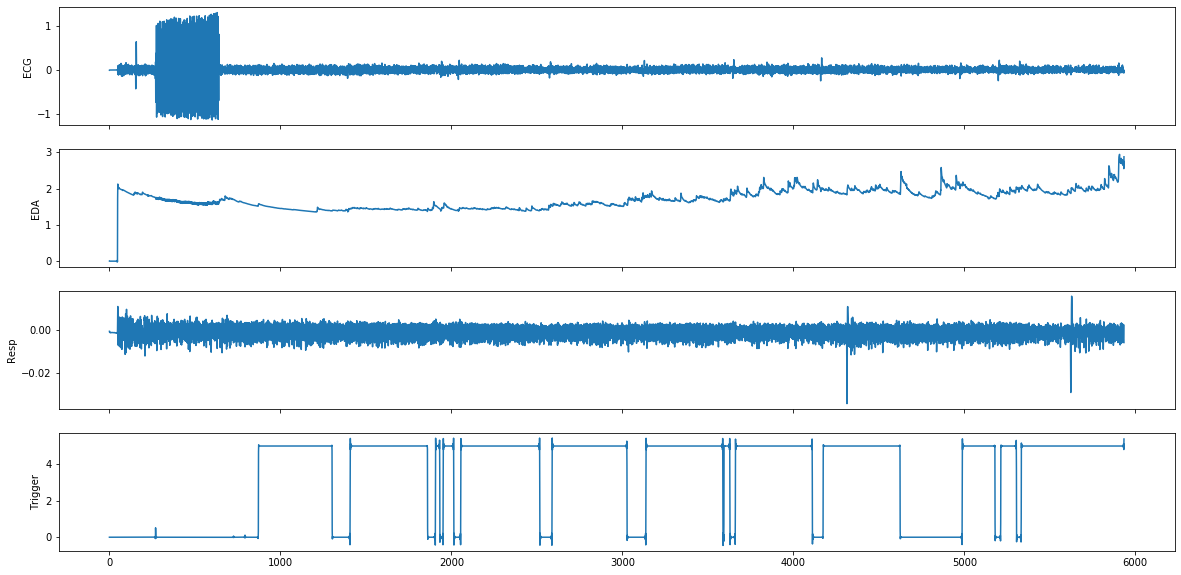

In [75]:
fig,ax = plt.subplots(ncols=1, nrows=4, figsize=(20,10), sharex=True)
g = sns.lineplot(time, ecg_s, ax=ax[0])
g.set_ylabel('ECG')
h = sns.lineplot(time, eda_s, ax=ax[1])
h.set_ylabel('EDA')
i = sns.lineplot(time, resp_s, ax=ax[2])
i.set_ylabel('Resp')
j = sns.lineplot(time, trigger_s, ax=ax[3])
j.set_ylabel('Trigger')

In [76]:
np.where(trigger_s >= 5)

(array([ 873,  875,  877,  879,  880,  881, 1293, 1294, 1295, 1296, 1297,
        1299, 1301, 1409, 1411, 1413, 1415, 1417, 1851, 1852, 1853, 1854,
        1855, 1856, 1857, 1858, 1859, 1908, 1910, 1912, 1914, 1916, 1917,
        1923, 1925, 1927, 1929, 1931, 1953, 1955, 1957, 1959, 1961, 1962,
        2005, 2007, 2009, 2011, 2013, 2056, 2058, 2060, 2062, 2064, 2065,
        2507, 2508, 2510, 2512, 2514, 2516, 2590, 2592, 2594, 2596, 2598,
        3018, 3020, 3022, 3024, 3026, 3139, 3141, 3143, 3145, 3147, 3578,
        3579, 3581, 3583, 3585, 3587, 3597, 3599, 3601, 3602, 3603, 3604,
        3620, 3622, 3624, 3626, 3628, 3662, 3664, 3666, 3668, 3670, 3671,
        4102, 4104, 4106, 4108, 4110, 4176, 4178, 4180, 4182, 4183, 4184,
        4615, 4616, 4617, 4618, 4619, 4621, 4623, 4989, 4991, 4993, 4995,
        4997, 4998, 5170, 5171, 5172, 5173, 5175, 5177, 5179, 5214, 5216,
        5218, 5220, 5221, 5222, 5223, 5296, 5298, 5300, 5302, 5304, 5334,
        5336, 5338, 5340, 5342, 5343, 

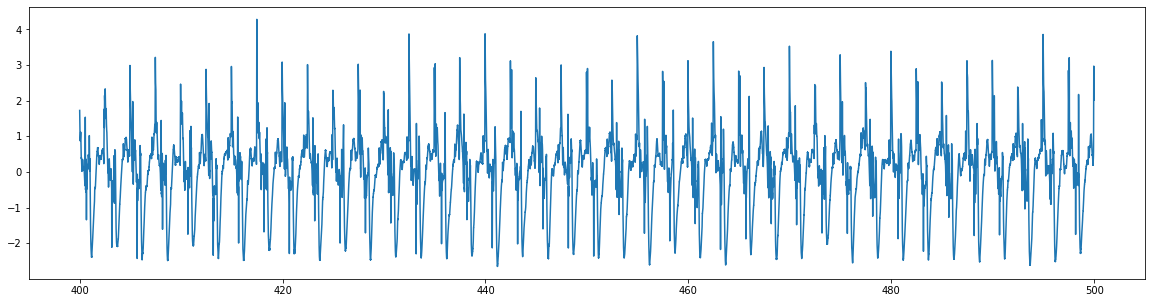

In [92]:
fig,ax  = plt.subplots(figsize=(20,5))
sns.lineplot(data.time_index[800000:1000000], ecg[800000:1000000])